# Data preparation

We combine the data, convert the labels for classification and apply augmentation

In [85]:
import os, sys, math, json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split

import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

np.random.seed(0)

IMAGE_SIZE = [32, 32]

Tensorflow version 2.7.0


In [86]:
df = pd.read_json('../data/labelled_data/prepared-samples-binary.json')

y = df['label'].to_numpy()
X = np.array(df['data'].to_list())
X = np.expand_dims(X, axis=3)
print(y.shape)
print(X.shape)

(200,)
(200, 32, 32, 1)


In [87]:
# Create train / val / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [88]:
# Simple MLN Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32)))
model.add(tf.keras.layers.Dense(512, activation='elu'))
model.add(tf.keras.layers.Dense(256, activation='elu'))
model.add(tf.keras.layers.Dense(32, activation='elu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

model.compile(
optimizer='adam',
loss= 'binary_crossentropy',
metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 1024)              0         
                                                                 
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 32)                8224      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_39 (Dense)            (None, 1)                 33        
                                                                 
Total params: 664,385
Trainable params: 664,385
Non-tr

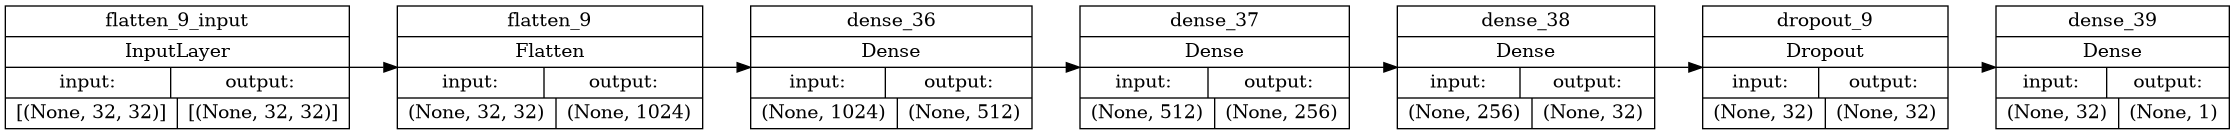

In [89]:
# Plot the model
# `rankdir='LR'` is to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/10
8/8 [==============================] - 1s 50ms/step - loss: 8.1025 - accuracy: 0.5083 - val_loss: 0.8318 - val_accuracy: 0.6500
Epoch 2/10
8/8 [==============================] - 0s 28ms/step - loss: 1.0536 - accuracy: 0.4833 - val_loss: 0.6527 - val_accuracy: 0.6500
Epoch 3/10
8/8 [==============================] - 0s 29ms/step - loss: 0.7720 - accuracy: 0.5750 - val_loss: 0.6534 - val_accuracy: 0.6500
Epoch 4/10
8/8 [==============================] - 0s 25ms/step - loss: 0.8034 - accuracy: 0.5083 - val_loss: 1.5327 - val_accuracy: 0.6500
Epoch 5/10
8/8 [==============================] - 0s 19ms/step - loss: 0.8106 - accuracy: 0.5000 - val_loss: 0.7349 - val_accuracy: 0.3500
Epoch 6/10
8/8 [==============================] - 0s 13ms/step - loss: 0.7998 - accuracy: 0.4333 - val_loss: 0.6608 - val_accuracy: 0.6500
Epoch 7/10
8/8 [==============================] - 0s 12ms/step - loss: 0.7128 - accuracy: 0.5833 - val_loss: 0.6479 - val_accuracy: 0.6500
Epoch 8/10
8/8 [===========

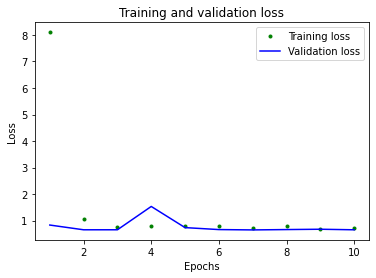

Test loss: 0.6743729710578918 / Test accuracy: 0.6000000238418579


In [90]:
# Fit the model
EPOCHS = 10
BATCH_SIZE = 16
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_val, y_val))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

# Plot training history
plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("simpleCnn-eval.png")
plt.show()

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [103]:
n=4 # pics per row

label = {1: 'Human',
         0: 'No Human'}

pred = model.predict(X_test)

def get_class(x):
    if x>=0.5:
        return 1
    return 0

get_classv = np.vectorize(get_class)

classes = get_classv(pred.squeeze())

print(pred) 
print(f'{y_test} {sum(y_test)} / {y_test.shape[0]}')
print(classes)

[[0.3932727 ]
 [0.39776278]
 [0.39877796]
 [0.39801902]
 [0.39711028]
 [0.39269638]
 [0.39750186]
 [0.39861035]
 [0.398457  ]
 [0.39956474]
 [0.3956241 ]
 [0.39923358]
 [0.40061638]
 [0.40079623]
 [0.39804262]
 [0.3921385 ]
 [0.39835152]
 [0.39643073]
 [0.3975141 ]
 [0.39820188]
 [0.39799407]
 [0.40048474]
 [0.3987463 ]
 [0.3997089 ]
 [0.39746213]
 [0.39839888]
 [0.39663833]
 [0.3977383 ]
 [0.39557537]
 [0.39735612]
 [0.39846098]
 [0.40005398]
 [0.39846337]
 [0.39972597]
 [0.39569533]
 [0.39895967]
 [0.39439908]
 [0.4002434 ]
 [0.39612705]
 [0.4002032 ]]
[1 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 0 0 0] 16 / 40
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


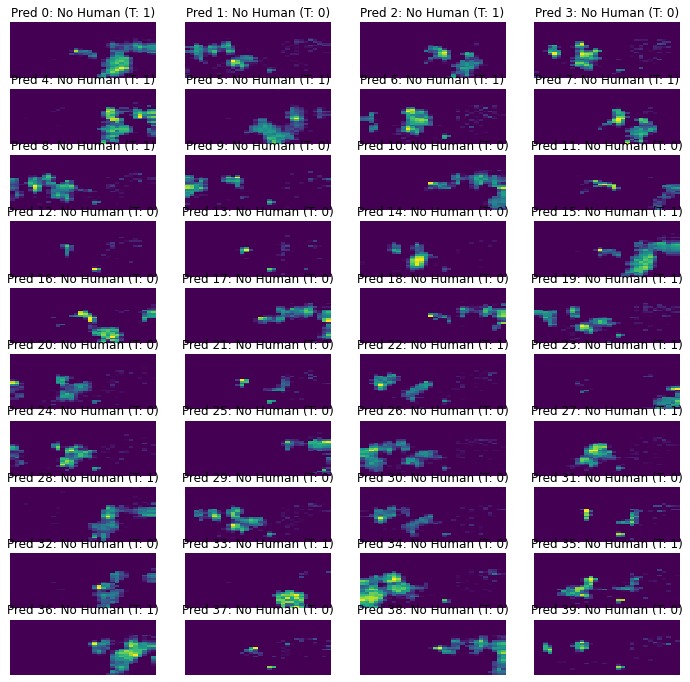

In [92]:
# Print predictions
fig, axes = plt.subplots(nrows=int(len(X_test)/n), ncols=n, figsize=(n*3, n*3), num='Predictions')
for ax, idx in zip(axes.reshape(-1), range(len(X_test))): 
    ax.set_axis_off()
    ax.set_title('Pred %i: %s (T: %i)' % (idx, label[classes[idx]], y_test[idx]))
    ax.imshow(X_test[idx].reshape(32, 32), interpolation='nearest', aspect='auto')

In [93]:
# Export saved model
tf.keras.models.save_model(model, "simpleCnn-binary.h5")